<a href="https://colab.research.google.com/github/yiwenff/RShub_demo/blob/main/Run_Total_RTE_Veg_from_server.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vegetation Radiative Transfer Model Demo

In [1]:
import requests
import json
import uuid
import time
import datetime

In [2]:
!pip install https://rshub.zju.edu.cn/projects/rstool-0.0.tar.gz

  Preparing metadata (setup.py) ... done
  Created wheel for rstool: filename=rstool-0.0-py3-none-any.whl size=2923 sha256=16f32410f3fdb0d59e3e2685561d8b3941d46b09b9eede17d371c879922231df
  Stored in directory: /root/.cache/pip/wheels/18/bc/d6/8a73e48a9f91c470df704980f85aa5b9ed8b12086a6cad0719
Successfully built rstool


## How would vertical distribution of vegetation structure impact Tb?

In [6]:
# Define user token
token = '6uf0z22#$m!!0095xo**1vy1s*04k!'
project_name = 'Vegetation Demo'
task_name = 'Two Layer Case3'

In [5]:
# ============== CHANGE YOUR INPUT PARAMETERS HERE ==============
# ====== Parameters not define will be set to default values ======
# Step 1: Define Scenario flag
# 1: Bare soil
# 2: Snow
# 3: Vegetation covered soil
scenario_flag = 3

# Step 2: Define observation description
# 1) Observation mode
# 1: Active (Backscatter)
# 2: Passive (Brightness temperature)
output_var = 2

# 2) Observation characteristics
fGHz = [1.41,6.925, 10.65]

# Step 3: Define Algorithm flag
# 1: RT
algorithm = 1

# Step 4: Describe your scenario
scatters=[[]]
# Primary Branch
types = 1
VM = 0.37
L = 7.85
D = 0.15
beta1 = 0
beta2 = 0
disbot = 0
distop = 8
NA = 0.24
scatters[0]=[types, VM, L, D, beta1, beta2, disbot, distop, NA]

# Leaf
types = 1
VM = 0.444
L = 0.555
D = 0.0112
beta1 = 35
beta2 = 90
disbot = 8
distop = 8
NA = 0.24
scatters.append([types, VM, L, D, beta1, beta2, disbot, distop, NA])
print(scatters)


[[1, 0.37, 7.85, 0.15, 0, 0, 0, 8, 0.24], [1, 0.444, 0.555, 0.0112, 35, 90, 8, 8, 0.24]]


In [7]:
data = {
    'scenario_flag': scenario_flag,
    'output_var': output_var,'fGHz': fGHz,
    'algorithm':algorithm,
    'scatters': scatters,'core_num':2,
    'project_name':project_name,
    'task_name':task_name,
    'token': token,
    'level_required':1
}

## Run models

In [8]:
from rstool import submit_jobs
result=submit_jobs.run(data)

{"scenario_flag": 3, "output_var": 2, "fGHz": [1.41, 6.925, 10.65], "algorithm": 1, "scatters": [[1, 0.37, 7.85, 0.15, 0, 0, 0, 8, 0.24], [1, 0.444, 0.555, 0.0112, 35, 90, 8, 8, 0.24]], "core_num": 2, "project_name": "Vegetation Demo", "task_name": "Two Layer Case3", "token": "6uf0z22#$m!!0095xo**1vy1s*04k!", "level_required": 1}


'{"model":"Vegetation Passive Radiative Transfer (VPRT) Model","outpath":"qVdfCRTeZU8DTkBnzt6rwhVWN2kEVO","result":"Job submitted! Check Email for details."}\n'

In [ ]:
UID=result["output"]

In [9]:
# Store log information
now = datetime.datetime.now()
logname = 'log_' + now.strftime("%Y%m%d%H%M%D") + '.txt'
f = open('log.txt',"a")
head_string = '======' + now.strftime("%Y%m%d%H%M%D") + '======' + "\n"
f.write(head_string)
f.write(f' ID = {UID} \n')
f.write(f' data = {data} \n')
f.write('================================ \n')
f.close()

## Check status of code

In [ ]:
submit_jobs.check_state(UID)

job 1 out of 5: R
R
job 1 out of 5: R
R
job 1 out of 5: C
C
job 2 out of 5: C
C
job 3 out of 5: C
C
job 4 out of 5: R
R
job 4 out of 5: R
R
job 4 out of 5: R
R
job 4 out of 5: R
R
job 4 out of 5: C
C
job 5 out of 5: R
R
job 5 out of 5: R
R
job 5 out of 5: R
R
job 5 out of 5: R
R
job 5 out of 5: R
R
job 5 out of 5: R
R
job 5 out of 5: R
R
job 5 out of 5: R
R
job 5 out of 5: R
R
job 5 out of 5: R
R
job 5 out of 5: C
C


' files are stored in 799abf6a-05b0-4532-8827-7cf78dc3fe51'

# Post Process

In [10]:
from rstool.load_file import load_mat_file

In [11]:
mat_data1 = load_mat_file(token, project_name, task_name,'1.41')
mat_data_multi = mat_data1.load_veg_TB()
# Read variables into python
TU_all = mat_data_multi['TU_all'] # Tbs
theta_obs = mat_data_multi['theta_obs'] # theta

https://rshub.zju.edu.cn/projects/qVdfCRTeZU8DTkBnzt6rwhVWN2kEVO/TB/TB_fGHz1.41.mat


In [12]:
mat_data2 = load_mat_file(token, project_name, task_name,'6.925')
mat_data_multi2 = mat_data2.load_veg_TB()
# Read variables into python
TU_all2 = mat_data_multi2['TU_all'] # Tbs
theta_obs2 = mat_data_multi2['theta_obs'] # theta

https://rshub.zju.edu.cn/projects/qVdfCRTeZU8DTkBnzt6rwhVWN2kEVO/TB/TB_fGHz6.925.mat


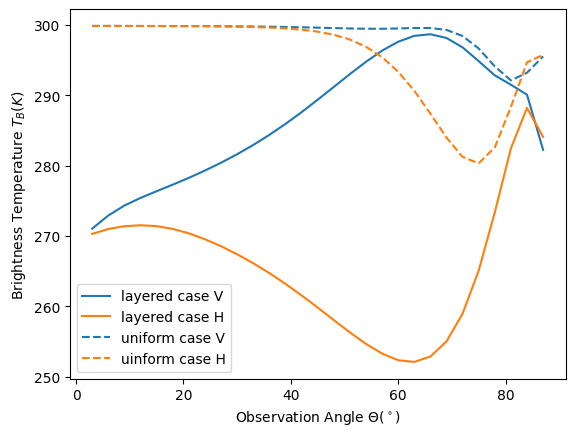

In [13]:
import matplotlib.pyplot as plt

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(theta_obs[0,:], TU_all[0,:], color='tab:blue')
ax.plot(theta_obs[0,:], TU_all[1,:], color='tab:orange')
ax.plot(theta_obs2[0,:], TU_all2[0,:], color='tab:blue',linestyle='--')
ax.plot(theta_obs2[0,:], TU_all2[1,:], color='tab:orange',linestyle='--')
ax.set(xlabel='Observation Angle $\Theta(^\circ)$', ylabel='Brightness Temperature $T_B(K)$')
ax.legend(['layered case V', 'layered case H', 'uniform case V', 'uinform case H'])